# 머신러닝을 활용한 모델 기반 협업 필터링

## 모델 기반 협업 필터링이란?

### 기존 이웃 기반 CF

유저 $u \in U$, 아이템 $i \in I$에 대해 평점 데이터 $r(u, i)$가 존재할 때, 유저 $u$의 아이템 $i$에 대한 평점을 예측한다면,

1) User-based : 아이템 $i$에 대한 평점이 있으면서 유저 $u$와 유사한 유저들의 집합을 $\varOmega_{i}$라 한다면,

$\hat{r}(u,i) = \frac{\sum_{u' \in \varOmega_{i}} sim(u, u') \cdot r(u', i)}{\sum_{u' \in \varOmega_{i}} sim(u, u')}$

2) Item-based : 유저 $u$가 평가를 한 다른 아이템 중에서 아이템 $i$와 유사한 아이템들의 집합을 $\varPhi_{u}$라한다면,

$\hat{r}(u,i) = \frac{\sum_{i' \in \varPhi_{i}} sim(i, i') \cdot r(u, i')}{\sum_{i' \in \varPhi_{i}} sim(i, i')}$

- `Memory-based CF`라고도 불리며, 유저와 아이템을 직접 연관시켜 추천하기 때문에 설명력이 높고 적용이 용이합니다.
- 특징
    - 구현이 쉽고 간단
    - 유저-아이템 간의 `유사도`에 크게 의존
    - 데이터의 `Sparsity`에 매우 취약 $\to$ 그러나 대부분의 Real World의 데이터는 `Sparse`합니다
    - 추천 결과를 생성할 때마다 많은 연산은 요구 $\to$ 유저, 아이템이 늘어날 수록 확장성`Scalability`이 떨어집니다.


- 기존엔 있는 데이터를 기반으로 했다면, 이번엔 `Deep Learning` 기반으로 추천하여 문제를 극복합니다.

### Model-based Collaborative Filtering 특징

#### Parametric Machine Learning

- 주어진 데이터를 사용하여 모델을 학습합니다
- 데이터의 정보가 데이터 패턴`Parameter`의 형태로 모델에 압축됩니다
- 지속적인 최적화`Optimization`을 통해 업데이트합니다 $\to$ `Machine Learning` 방식

#### 데이터의 패턴 = 유저-아이템의 '잠재적' 특성

- `이웃 기반 CF`는 유저-아이템 벡터를 데이터를 통해 '계산'된 형태로 저장하고 있습니다
- 반면, `Model-based CF`의 경우 유저, 아이템 벡터는 모두 '학습'을 통해 변하는 `Parameter`가 됩니다

#### Real World에서는 Matrix Factorization 기법이 가장 많이 사용

- 최근에 `MF` 원리를 `Deep Learning`에 응용한 모델이 더 높은 성능을 냅니다.
- 그렇다고 하지만 현업에서 자주 사용되진 않고 논문에 주로 사용된다고 합니다.

### Model-based Collaborative Filtering의 장단점


#### 모델의 학습/서빙

- 유저-아이템 데이터는 학습에만 사용되고, 학습된 모델은 '압축'된 형태로 저장이 됩니다
- 그래서 이미 학습된 모델을 통해 추천 결과를 서빙하기 때문에 속도가 빠릅니다

#### Sparsicty/Scalability 극복

- `이웃 기반 CF`에 비해 `sparse`한 데이터에서도 좋은 성능을 보입니다 $\to$ 가지고 있는 데이터만으로 학습해서 결과를 예측하기 때문!
- 사용자, 아이템 개수가 늘어나도 마찬가지로 좋은 성능을 보입니다

#### Overfitting 방지

- `이웃 기반 CF`와 비교했을 때 전체 데이터의 패턴을 학습하도록 모델이 작동해서 편향적인 예측 결과를 방지합니다

#### LImited Coverage

- `이웃 기반 CF`의 경우 공통의 유저 / 아이템을 많이 공유해야만 `유사도` 값이 정확해집니다
- `유사도` 값이 정확하지 않은 경우 이웃의 효과를 보기 어려운 반면, 공유가 안되더라도 학습이 잘됩니다

### Rating Matrix(Explicit Feedback)

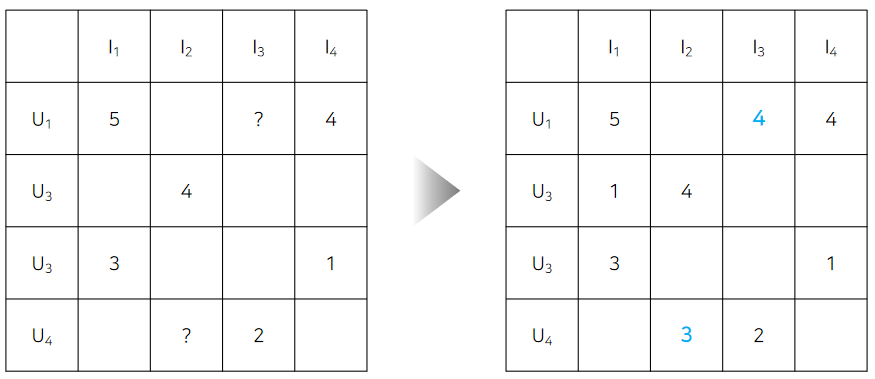

- 주어진 `Matrix`에 평점을 기반으로 유저가 아이템에 '주게 될' 평점을 예측합니다

### User-item Matrix(Implicit Feedback)

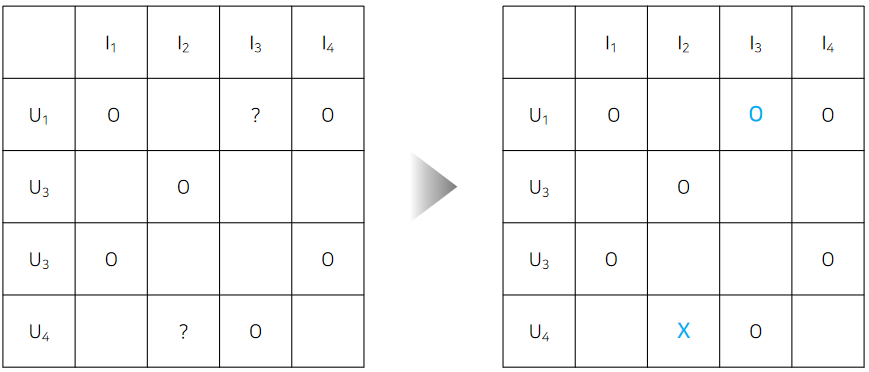

- 이 경우엔 몇몇 아이템에 흥미를 가져서 '클릭'을 했습니다
- 그리고 '클릭'을 안한 아이템에 대해서(관심이 없거나 또는 노출이 안되었거나) '클릭'을 하게될 것인가 아닌가에 대한 '예측'을 합니다

## Latent Factor Model과 Singular Value Decomposition

### Latent Factor Model

- 유저와 아이템을 잠재적 요인을 사용해 표현할 수 있다고 보는 모델입니다
    - 다양하고 복잡한 유저와 아이템들의 특성을 몇 개의 벡터로 `compact`하게 표현하며 이를 `Representation`이라고도 합니다
- 유저와 아이템을 같은 차원에 `투영`하여 벡터로 표현하여 나타냅니다
    - 차원의 개수는 여러개
    - 각 차원의 의미는 모델 학습을 통해 생성되며, 표면적으로 무엇을 의미하는지 알 수가 없습니다
- 같은 벡터 공간에서 유저와 아이템 벡터가 놓일 경우 유저와 아이템 유사한 정도를 알 수 있습니다



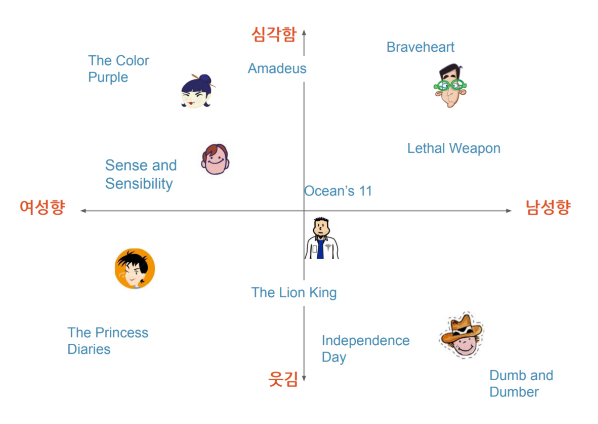

- 유저와 아이템을 같은 차원에 투영한 결과를 기반으로 추천을 제공하게 됩니다

### Singular Value Decomposition(SVD)

- Rating Matrix $R$에 대해 유저와 아이템의 잠재 요인을다포함할 수 있는 행렬로 분해합니다
    1. 유저 잠재 요인 행렬
    2. 잠재 요인 대각 행렬
    3. 아이템 잠재 요인 행렬
- 행렬 분해 방식으로, 차원을 축소해서 수백, 수억 차원짜리를 압축`compact`합니다
    - 선형 대수학에서 차원 축소 기법 중 하나로 분류됩니다
    - 주성분분석`PCA`도 차원 축소 기법 중 하나입니다
    - 선형 대수학에선 이를 `Demension Reduction Model`이라고도 불립니다
- 실제 Netflix Prize에서 추천 시스템에 적용된 단일 알고리즘으로 가장 좋은 성능을 보인다고 합니다
    - 현재는 `SVD` 원리를 차용하되, 다양한 최적화 기법을 적용한 `MF`가 더 많이 사용 됩니다 $\to$ `SGC`, `ALS`, `BPR` 등

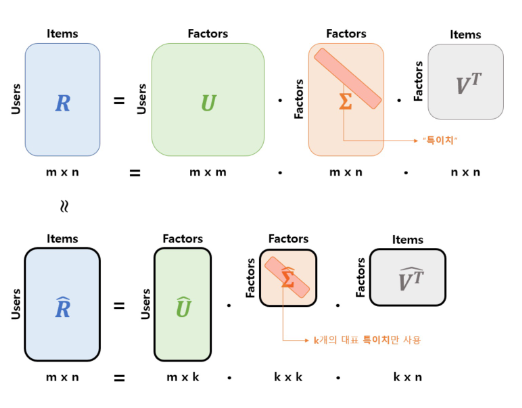

#### Full SVD : $R = U \varSigma V^{T}$
- $U$ : 유저의 `Latent Vector`
    - $U$의 열`column` 벡터는 $R$의 '좌측' 특이치 벡터`Singular Vector`
- $V$ : 아이템의 `Latent Vector`
    - $V$의 열`column` 벡터는 $R$의 '우측' 특이치 벡터`Singular Vector`
- $\varSigma$ : `Latent Vector`의 중요도
    - $RR^{T}$을 '고유값 분해'해서 얻은 직사각 대각 행렬로, 대각 원소들은 $R$의 특이치`Singular Value`입니다
    - 여기서 직사각 대각 행렬은 강조 표시된 부분에 각 아이템의 중요도를 내림차순으로 기입되 있습니다
- 참고(선형 대수학 관련 수식)

    $UU^{T} = I$, $V^{T}V = I$ ($U$, $V$는 직교행렬)

    $RR^{T} = U(\varSigma\varSigma^{T})U^{T}$

    $R^{T}R = V(\varSigma^{T}\varSigma)V^{T}$

#### Truncated SVD : $R = U\varSigma V^{T} \approx \hat{U} \varSigma_{k} \hat{ V^{T}} = \hat{R}$
- 대표 값으로 사용된 `k` 개의 특이값`Sigular Value`만 사용하며, `k`는 하이퍼 파라미터입니다 $\to$ 직접 설정해서 적절한 값을 찾아야 함
- 평점 예측 결과인 $\hat{R}$은 축소된 $\hat{U},\varSigma_{k},\hat{V^{T}}$에 의해 계산됩니다

#### 수행의 목적과 이유
- 최종적으로 $R$이랑 비슷한 $\hat{R}$을 만들어 적절한 결과를 유추합니다
- 두 수치가 조금 다르지만, `truncate`를 통해 결과에 영향을 크게 주지 않는 선에서 퍼포먼스 성능을 이끌어 낼 수 있습니다 $\to$ `k`가 너무 크면 성능이 그대로, 너무 작으면 결과가 달라짐
- `k`개의 Latent Factor의 의미는 유추할 수 있지만, 정확히 어떤 특성을 가지는지는 알 수가 없습니다 $\to$ 선호하는게 무엇이구나 정도만 알 수 있음

### SVD 문제점

- 분해`Decomposition`하려는 행렬의 Knowledge가 불완전하면 정의되지가 않습니다
    - 그래서 `sparsity`가 높은 데이터의 경우 결측치가 매우 많고, 실제 데이터는 대부분 `sparse matrix`입니다
- 그래서 결측된 entry를 모두 채워`Imputation`, `Dense matrix`를 만들어 `SVD`를 수행하게 됩니다
    - `Imputation`은 데이터 양을 상당히 증가 시켜 결국 퍼포먼스 비용이 높아집니다
    
    ex. 결측된 entry를 `0`이나 `유저/아이템의 평균 평점`으로 채움

- 정확하지 않은 `imputation`은 데이터를 왜곡시키고, 예측 성능을 떨어뜨립니다
    - 행렬의 entry가 적을 때 `SVD` 적용 시 과적합`overfitting`되기 쉬움
- 따라서, `SVD` 원리를 차용하되, `MF`를 학습하기 위한 '근사적'인 방법을 활용합니다 $\to$ Full `SVD`부터 시작하는게 아니라, 처음부터 `k`개의 정해 놓은 차원으로 시작하는 방식

### SVD와 Matrix Factorization(MF)

- $R$ = $PQV^{T}$

##  Matrix Factorization

- 실제 `Matrix Factorization`의 구현은 유저 matrix, 아이템 matrix 2개로 이루어졌습니다
- `SVD`로 분해된 행렬의 $\varSigma$를 $U$나 $V^{T}$에 곱해서 흡수시키면 `MF`와 동일합니다

    $(N \times K) \times (K \times K) \times (K \times M) = (N \times K) \times (K \times M)  = (N \times M)$

    $R \approx U\varSigma_{k} V^{T} \
    = (U\varSigma_{k}) V^{T} \
    = U(\varSigma_{k}) V^{T}
    $

    $\hat{r_{u,i}} = \varSigma_{k} u_{ik}s_{kk}v_{kj}$

    $ = \varSigma_{k} (u_{ik}s_{kk})v_{kj} = \varSigma_{k} u_{ik}'v_{kj} = u_{i}'^{T} v_{j}$

    $ = \varSigma_{k} u_{ik}(s_{kk}v_{kj}) = \varSigma_{k} u_{ik} v_{kj}' = u_{i}^{T} v_{j}'$


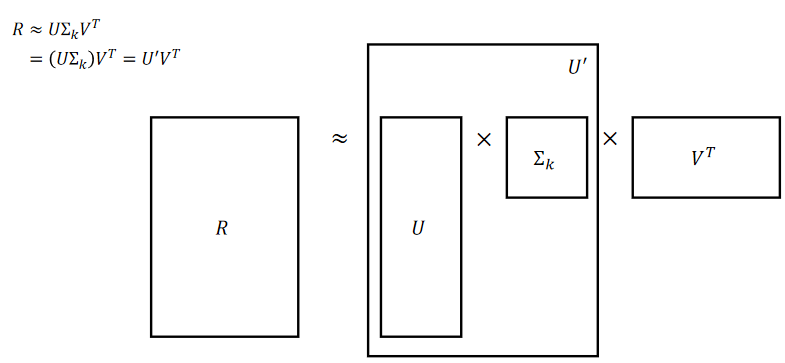

- `Rating Matrix`를 유저 Factor`P`와 아이템 Factor`Q`로 분해

 $R \approx P \times Q^{T} = \hat{R}$

 $P \to \lvert U \rvert \times k$

 $Q \to \lvert I \rvert \times k$

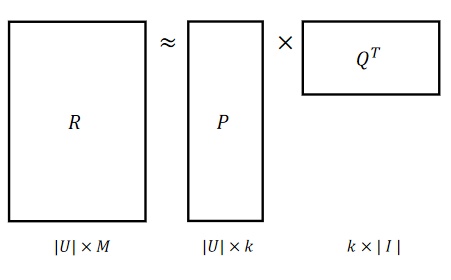

- 평점 예측치 : $\hat{r_{u, i}} = p_{u}^{T} q_{i}$
- `MF` 학습 : $R$과 $\hat{R}$이 최대한 '유사'하도록 `X`, `Y`를 학습하는 과정이라 보면 됩니다

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2}$

- 여기서 `observed`는 유저와 아이템 값이 관측된 값만 대응한다는 의미입니다

### Objective Function

- $\lambda$는 `overfitting` 방지
- L2가 많이 쓰임, L1 거의 사용 X
- ||pu2||는 제곱 값을 루트 -> ppt상에선 이를 또 제곱!

### Stochastic Gradient Descent(SGD) in MF


- Stochastic :


### Adding Biases

- 실제로 적용하니 성능이 확 올랐음

### Temporal Dynamics

- 자주 활용은 안하나, 참고를 합시다
- 시간에 따른 예측도 반영을 해야함
- 최근 7일치만 해서 학습한다던가...


### Inputs with Varying Confidence Level

- 신뢰도 : 너무 많이 등장한 아이템은 신뢰도 값을 내리고, 적게 등장한 아이템은 값을 올리는 방식으로 다양한 아이템에 신뢰도를 부여

### Alternative Least Square(ALS)

- least-square 문제 풀기
- Solving 이후 여기서 실습
- ALS는 Bias 못 넣음 -> Implicit Feedback을 활용하는 알고리즘은 Bias가 필요 없기도 함

### Using Preference/Confidence

## BPR Optimization With MF


- 넘어가도 되지만....배우자!
- 논문에선 AUC! 우리는 아님ㅋ

### Personalized Ranking

- 0, 1, 0, 1로 바꾸지 않고 유저 기준으로 새로 Matrix 구성
- 가정이 완벽한것은 아니지만 개인화 랭킹을 위해선 필요한 과정임
- i : 유저가 본거, j : 유저가 안본거

### BPR Optimization

- MLE vs. MAP(요거 모르면 알 수없는 개념이라 이걸 안 다음에 들어가야 편해용)
- 시그모이드 사용 -> 0,1이기 $\sigma$
- Prior: 모든 파라미터 `P,` `Q`가 평균이 모두 0이고 표준편차가 나온다`정규 분포`
- ALS보단 안쓰지만 큰 종적을 남겼기 때문에 중허다 -> 학술적 가치가 높음

## Annoy를 활용한 서빙

- 아이템간 `유사도` 구하는 방식도 오래걸림, 데이터가 많을경우 -> cosine
- 그래서 나온게 `Annoy`
- 추천 시스템 뿐만 아니라 다양한 문제에서도 사용됨
- dot product...? -> 유저에게 아이템 추천